# Importando e analisando as notas em geral

In [0]:
!pip install seaborn==0.9.0
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

notas = pd.read_csv("ratings.csv")

notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()
print("Todos valores existentes na tabela: ", notas['nota'].unique(), '\n')

print("total de cada valor existente na tabela:")
print(notas['nota'].value_counts(), '\n')
print("media: ", notas['nota'].mean(), '\n')
print("mediana: ", notas.nota.median(), '\n')
notas.nota.plot(kind='hist')
print("descricao: ")
notas.nota.describe()

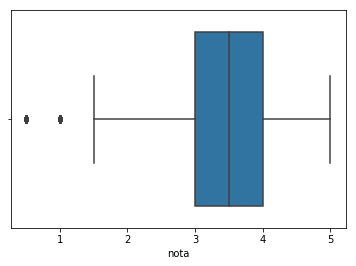

In [0]:
sns.boxplot(notas.nota)

# **Analisado algumas notas especificas por filme**


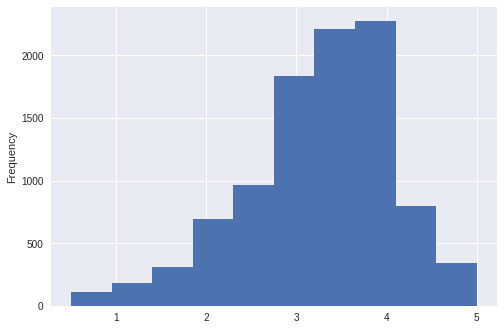

In [0]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmesId", "titulo", "generos"]

media_unitaria_po_id = notas.query("filmeId==2").nota.mean()
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.plot(kind='hist')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


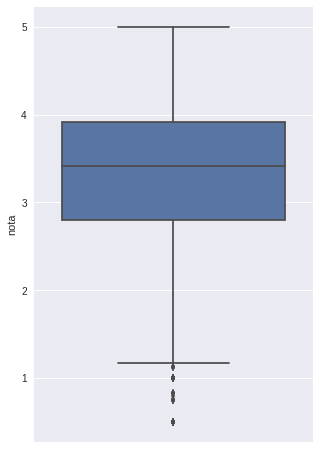

In [0]:


plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [0]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

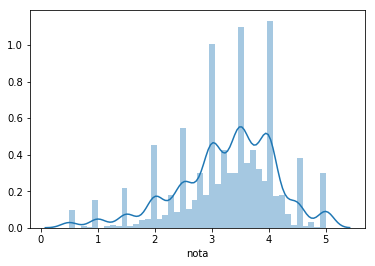

In [0]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das medias dos filmes')

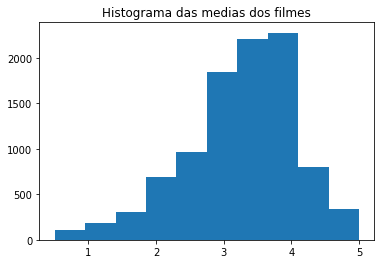

In [0]:


plt.hist(medias_por_filme)
plt.title("Histograma das medias dos filmes")

In [0]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
id       2
cs       2
ar       2
ro       2
vi       1
sl       1
el       1
te       1
nb       1
tr       1
ps       1
af       1
hu       1
ky       1
is       1
xx       1
pl       1
no       1
Name: original_language, dtype: int64

In [0]:
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


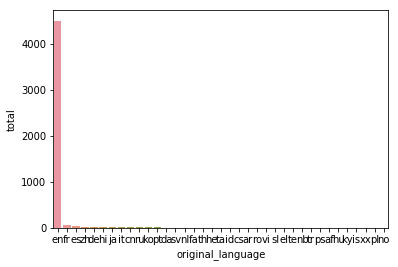

In [0]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

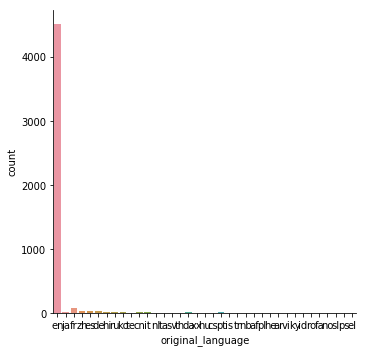

In [0]:

sns.catplot(x="original_language", kind="count", data = tmdb)

In [0]:
plt.pie(contagem_de_lingua["total"], labels=  contagem_de_lingua["original_language"])

In [0]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


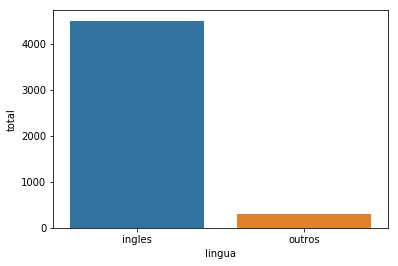

In [0]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x = "lingua", y = "total", data = dados)

([<matplotlib.patches.Wedge at 0x7efbf1c35470>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

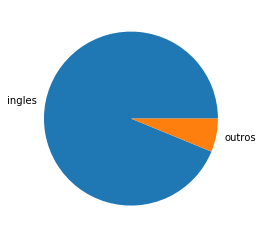

In [0]:
plt.pie(dados["total"], labels=  dados["lingua"])

In [0]:
total_de_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_de_lingua_de_outros_filmes


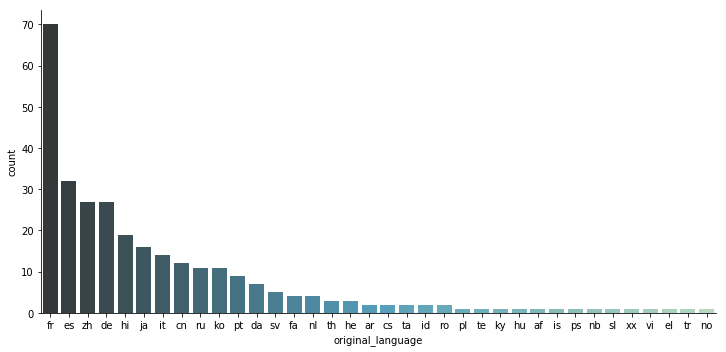

In [0]:
filmes_sem_lingua_original_em_inlges = tmdb.query("original_language != 'en'")

sns.catplot(x="original_language", kind="count", data = filmes_sem_lingua_original_em_inlges, 
            aspect= 2, 
            palette = "GnBu_d",
            order = total_de_lingua_de_outros_filmes.index)

# Revisando o papel da média, mediana, medidas de tendencias central, dispersão, desvio padrão, boxplot, histograma

In [0]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [0]:
print("Nota média Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média Toy Story 3.92
Nota média Jumanji 3.43


In [0]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


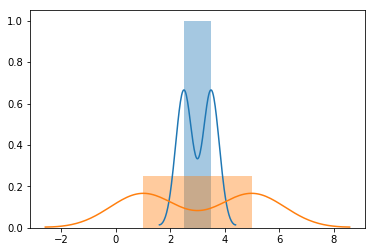

In [0]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

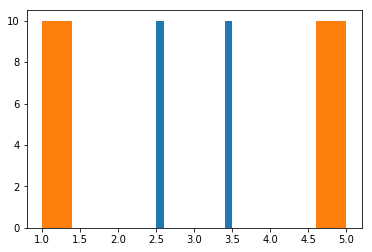

In [0]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7efbefee32b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efbefee3c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efbf01d6400>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efbeff7a828>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efbefee3358>,
  <matplotlib.lines.Line2D at 0x7efbf03839e8>]}

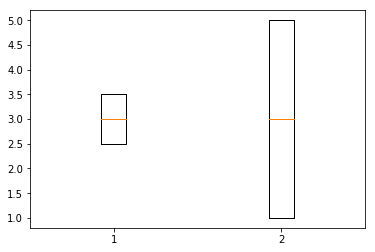

In [0]:
plt.boxplot([filme1, filme2])

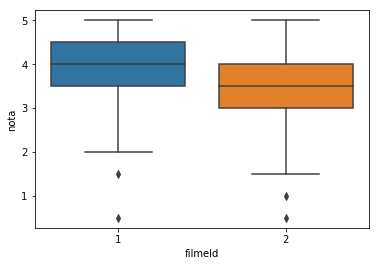

In [0]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2]"))

In [0]:
notas_do_jumanji.nota.std()

0.8817134921476455